In [60]:
#Importation des bibliothèques et du CSV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

df_original = pd.read_csv('spam.csv', encoding="ISO-8859-1")
df_original.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Nettoyage

In [3]:
#Retrait des colonnes inutiles
df = df_original[['v1', 'v2']].copy()
df.rename(columns={"v1": "label", "v2": "content"}, inplace = True)
df.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print(df.label.value_counts(normalize = True))
#Proportion 'ham' : 4825/5572 = 86.6%

ham     0.865937
spam    0.134063
Name: label, dtype: float64


In [5]:
df.drop_duplicates(inplace = True)
#Retrait des lignes identiques 

print(df.label.value_counts(normalize = True))
#Proportion 'ham' : 4516/5169 = 87.4%
#Le Ratio ham/spam est donc conservé à 0.8% près après retrait des doublons.

df.describe()

ham     0.87367
spam    0.12633
Name: label, dtype: float64


,label,content
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [6]:
df.to_csv('spam_clean.csv',index = False)
#export du dataframe nettoyé dans le dossier de travail sous le nom de 'spam_clean.csv'

# Features

In [7]:
df = pd.read_csv('spam_clean.csv')

In [8]:
#Ajout d'une feature length contenant le nombre de caractère compris dans le SMS
df['length'] = df['content'].apply(len)
df

,label,content,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,161
5165,ham,Will Ì_ b going to esplanade fr home?,37
5166,ham,"Pity, * was in mood for that. So...any other s...",57
5167,ham,The guy did some bitching but I acted like i'd...,125


In [9]:
df.to_csv('spam_features.csv',index = False)

# Preprocessing

In [2]:
# data
import pandas as pd

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler


# Pipeline and model
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Score of models
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('spam_features.csv')
print(df.head(),'\n\n Nombre de null :',df.content.isnull().sum())

  label                                            content  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61 

 Nombre de null : 0


In [4]:
#Target preprocessing
lb_binar = LabelEncoder()
y = lb_binar.fit_transform(df.label)
type(y), y
# ham : 0, spam : 1

(numpy.ndarray, array([0, 0, 1, ..., 0, 0, 0]))

In [5]:
#Features preprocessing
X = df.drop(columns = 'label')
X.head()

,content,length
0,"Go until jurong point, crazy.. Available only ...",111
1,Ok lar... Joking wif u oni...,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,U dun say so early hor... U c already then say...,49
4,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
#Selection des features catégoriques
column_cat = df.select_dtypes(include=['object']).columns.drop(['content', 'label'])
print(column_cat)

#Pipeline de preprocessing des features numériques
transformer_cat = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')), #Imputation facultative car données complètes
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

Index([], dtype='object')


In [7]:
#Selection des features numériques
column_num = df.select_dtypes(include=['int','float']).columns
print(column_num)

#Pipeline de preprocessing des features numériques
transformer_num = Pipeline(steps = [
    ('imputation', SimpleImputer(strategy='median')), #Imputation facultative car données complètes
    ('scaling', MinMaxScaler())
])

Index(['length'], dtype='object')


In [8]:
#Features Columns Transformer
preparation = ColumnTransformer(transformers = [
    ('data_num', transformer_num, column_num), 
    ('data_cat', transformer_cat, column_cat)
])

In [9]:
#Création du modèle
model = DecisionTreeClassifier()

pipe_model = Pipeline(steps=[
    ('preparation', preparation),
    ('model', model)])

set_config(display = 'diagram')
pipe_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['length'], dtype='object')),
                                                 ('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [10]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
y_train, y_test, X_train, X_test

(array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 1, 0]),
                                                 content  length
 1818                   Sorry, I can't help you on this.      32
 4612                  I am in bus on the way to calicut      33
 4172  Thanks again for your reply today. When is ur ...     236
 4528                             I liked your new house      22
 199   Hello darlin ive finished college now so txt m...      84
 ...                                                 ...     ...
 1902                        Enjoy ur life. . Good night      27
 3489  Hey loverboy! I love you !! I had to tell ... ...     158
 2679               Mm so you asked me not to call radio      36
 1195                    Jus ans me lar. U'll noe later.      31
 2422  What's happening with you. Have you gotten a j...     104
 
 [4135 rows x 2 columns],
                                                 content  length
 3924  I just really need shit before tomorrow and I ...     

In [11]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['length'], dtype='object')),
                                                 ('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [76]:
y_pred = pipe_model.predict(X_test)

# Score of models
score = accuracy_score(y_test, y_pred)
print("score :", round(score, 5))

score : 0.89749


1034 [0 0 1 ... 0 1 0] 1034 [0 0 0 ... 0 1 0]


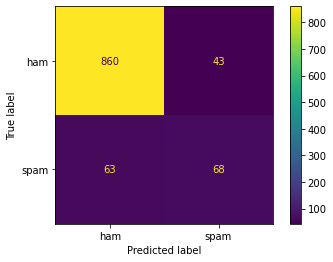

In [74]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ["ham", "spam"]).plot()

In [75]:
#Extraction des faux postifs et faux négatifs pour analyse
message = X_test.content.tolist() #Récupération de la liste des messages test
faux_positifs = []
faux_négatifs = []
for k in range(len(y_test)):
    if y_test[k] != y_pred[k]:
        if y_test[k] < y_pred[k]:
            faux_positifs.append(message[k])
        else:
            faux_négatifs.append(message[k])
len(faux_positifs), faux_positifs, len(faux_négatifs),faux_négatifs

(43,
 ['Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens',
  'Each Moment in a day,has its own value-Morning brings hope,afternoon brings faith,Evening brings luv,Night brings rest,Wish u find them all today.Good Morning',
  'WE REGRET TO INFORM U THAT THE NHS HAS MADE A MISTAKE.U WERE NEVER ACTUALLY BORN.PLEASE REPORT 2 YOR LOCAL HOSPITAL 2B TERMINATED.WE R SORRY 4 THE INCONVENIENCE',
  'Good afternoon on this glorious anniversary day, my sweet J !! I hope this finds you happy and content, my Prey. I think of you and send a teasing kiss from across the sea coaxing images of fond souveniers ... You Cougar-Pen',
  "Forgot you were working today! Wanna chat, but things are ok so drop me a text when you're free / bored etc and i'll ring. Hope all is well, nose essay and all xx",
  "Geeee ... I miss you already, you know ? Your all I can think about. Fuck, I can't wait till next year when